# Abhishek Batra, Adit Punamiya, Aditi Pawar
# I002,I003,I004
# Signal and image Processing Project

In [2]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

In [3]:
def removedot(invertThin):
    temp0 = np.array(invertThin[:])
    temp0 = np.array(temp0)
    temp1 = temp0 / 255
    temp2 = np.array(temp1)
    temp3 = np.array(temp2)

    enhanced_img = np.array(temp0)
    filter0 = np.zeros((10, 10))
    W, H = temp0.shape[:2]
    filtersize = 6

    for i in range(W - filtersize):
        for j in range(H - filtersize):
            filter0 = temp1[i:i + filtersize, j:j + filtersize]

            flag = 0
            if sum(filter0[:, 0]) == 0:
                flag += 1
            if sum(filter0[:, filtersize - 1]) == 0:
                flag += 1
            if sum(filter0[0, :]) == 0:
                flag += 1
            if sum(filter0[filtersize - 1, :]) == 0:
                flag += 1
            if flag > 3:
                temp2[i:i + filtersize, j:j + filtersize] = np.zeros((filtersize, filtersize))

    return temp2

In [4]:
def get_descriptors(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    img = np.array(img, dtype=np.uint8)
    
    ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
   
    img[img == 255] = 1

    skeleton = skeletonize(img)
    skeleton = np.array(skeleton, dtype=np.uint8)
    skeleton = removedot(skeleton)
 
    harris_corners = cv2.cornerHarris(img, 3, 3, 0.04)
    harris_normalized = cv2.normalize(harris_corners, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)
    threshold_harris = 125
    
    keypoints = []
    for x in range(0, harris_normalized.shape[0]):
        for y in range(0, harris_normalized.shape[1]):
            if harris_normalized[x][y] > threshold_harris:
                keypoints.append(cv2.KeyPoint(y, x, 1))

    orb = cv2.ORB_create()

    _, des = orb.compute(img, keypoints)
    return (keypoints, des)

In [5]:
def match_fingerprints(img1, img2):
    kp1, des1 = get_descriptors(img1)
    kp2, des2 = get_descriptors(img2)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = sorted(bf.match(des1, des2), key=lambda match: match.distance)

    return kp1, kp2, matches

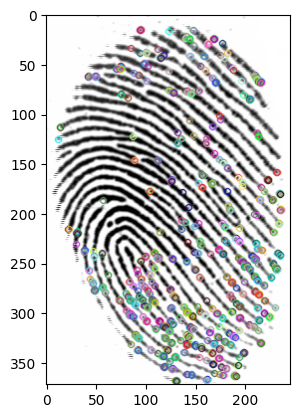

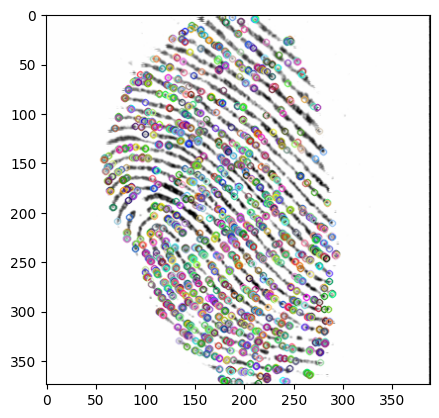

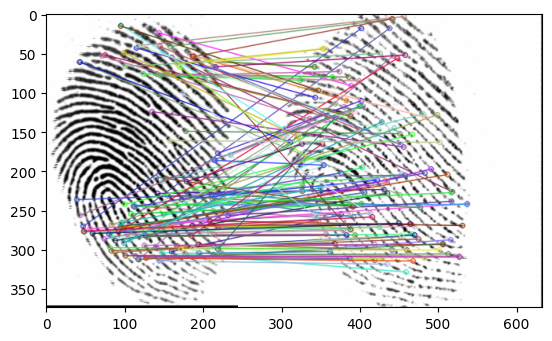

Fingerprint matches.


In [6]:
img1 = cv2.imread("101_1.tif", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("101_2.tif", cv2.IMREAD_GRAYSCALE)

kp1, kp2, matches = match_fingerprints(img1, img2)

img4 = cv2.drawKeypoints(img1, kp1, outImage=None)
img5 = cv2.drawKeypoints(img2, kp2, outImage=None)
plt.imshow(img4)
plt.show()
plt.imshow(img5)
plt.show()

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, flags=2, outImg=None)
plt.imshow(img3)
plt.show()

score = sum(match.distance for match in matches)
score_threshold = 33
if score / len(matches) < score_threshold:
    print("Fingerprint matches.")
else:
    print("Fingerprint does not match.")

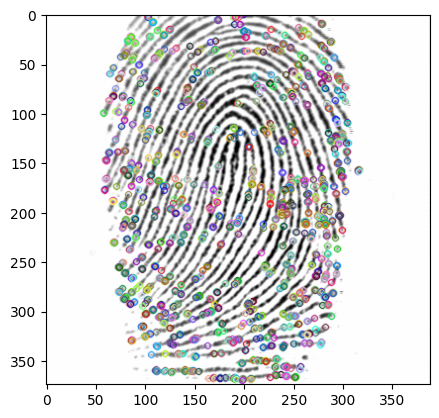

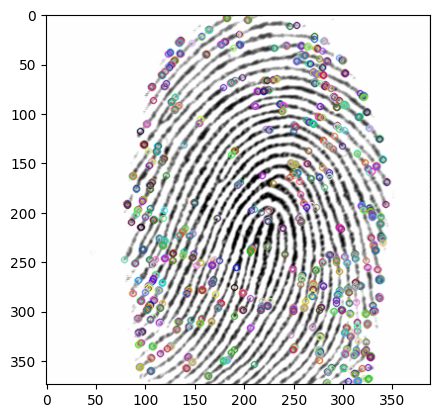

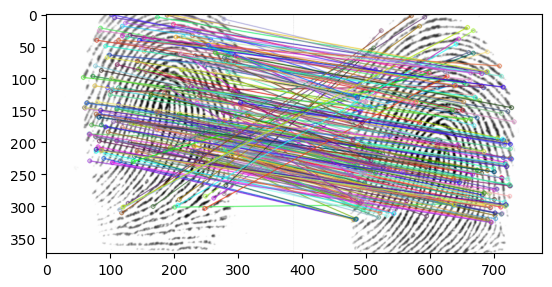

Fingerprint matches.


In [11]:
img1 = cv2.imread("102_1.tif", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("102_2.tif", cv2.IMREAD_GRAYSCALE)

kp1, kp2, matches = match_fingerprints(img1, img2)

img4 = cv2.drawKeypoints(img1, kp1, outImage=None)
img5 = cv2.drawKeypoints(img2, kp2, outImage=None)
plt.imshow(img4)
plt.show()
plt.imshow(img5)
plt.show()

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, flags=2, outImg=None)
plt.imshow(img3)
plt.show()

score = sum(match.distance for match in matches)
score_threshold = 33
if score / len(matches) < score_threshold:
    print("Fingerprint matches.")
else:
    print("Fingerprint does not match.")

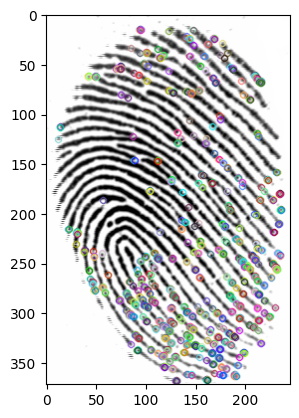

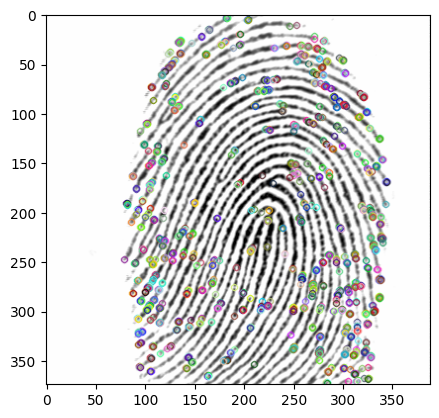

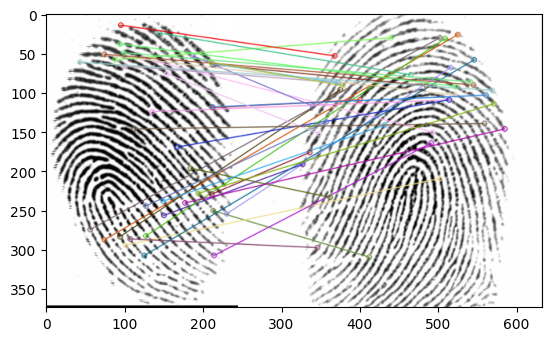

Fingerprint does not match.


In [8]:
img1 = cv2.imread("101_1.tif", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("102_2.tif", cv2.IMREAD_GRAYSCALE)

kp1, kp2, matches = match_fingerprints(img1, img2)

img4 = cv2.drawKeypoints(img1, kp1, outImage=None)
img5 = cv2.drawKeypoints(img2, kp2, outImage=None)
plt.imshow(img4)
plt.show()
plt.imshow(img5)
plt.show()

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, flags=2, outImg=None)
plt.imshow(img3)
plt.show()

score = sum(match.distance for match in matches)
score_threshold = 33
if score / len(matches) < score_threshold:
    print("Fingerprint matches.")
else:
    print("Fingerprint does not match.")